# 베스트 모델만들기

와인데이터
- 레드와인 데이터 : 1,599개
- 화이트와인 데이터 : 4,898개

In [2]:
import pandas as pd

df_pre = pd.read_csv('C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\dataset\\wine.csv', header=None)
# sample 함수 : 정해진 비율만큼 랜덤으로 뽑아오는 함수 1: 100%, 0.5:50%
df = df_pre.sample(frac=1)
print(df.head(5))

       0     1     2      3      4     5      6        7     8     9     10  \
593   9.9  0.49  0.58   3.50  0.094   9.0   43.0  1.00040  3.29  0.58   9.0   
121   8.8  0.55  0.04   2.20  0.119  14.0   56.0  0.99620  3.21  0.60  10.9   
2805  7.0  0.26  0.46  15.55  0.037  61.0  171.0  0.99860  2.94  0.35   8.8   
3599  6.8  0.31  0.09   1.40  0.040  56.0  145.0  0.99220  3.19  0.46  10.0   
4708  6.9  0.30  0.36   4.50  0.054  31.0  203.0  0.99513  3.40  0.57  10.4   

      11  12  
593    5   1  
121    6   1  
2805   6   0  
3599   5   0  
4708   4   0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 593 to 2385
Data columns (total 13 columns):
0     6497 non-null float64
1     6497 non-null float64
2     6497 non-null float64
3     6497 non-null float64
4     6497 non-null float64
5     6497 non-null float64
6     6497 non-null float64
7     6497 non-null float64
8     6497 non-null float64
9     6497 non-null float64
10    6497 non-null float64
11    6497 non-null int64
12    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


# 와인데이터 정보
0 : 주석산농도
1 : 아세트산 농도
2 : 구연산 농도
3 : 잔류 당분 농도
4 : 염화나트륨 농도
5 : 유리 아황산 농도
6 : 총 아황산 농도
7 : 밀도
8 : pH
9 : 황산칼륨농도
10 : 알코올 도수
11 : 와인의 맛 ( 0 ~10 등급)
12 : class(1:레드와인, 0 : 화이트와인)

In [6]:
# X , Y 값 분리 
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [7]:
# 모델 생성하기 4개의 은닉층 , 30 ,12, 8 , 1 
# 오차함수 : binary_crossentropy
# 최적화함수 : adam
# 배치사이즈 : 200 
# 반복횟수 : 200

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터입력
df_pre = pd.read_csv('C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\dataset\\wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X,Y,epochs=200,batch_size=200)

# 결과 출력
print("\n Accuracy : %.4f" %(model.evaluate(X,Y)[1]))

C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/200


 200/6497 [..............................] - ETA: 8s - loss: 0.5074 - acc: 0.7750

6497/6497 [==============================] - 0s 50us/step - loss: 0.3864 - acc: 0.8030


Epoch 2/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2554 - acc: 0.9000

5800/6497 [=========================>....] - ETA: 0s - loss: 0.2738 - acc: 0.9012

6497/6497 [==============================] - 0s 10us/step - loss: 0.2720 - acc: 0.9024


Epoch 3/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2637 - acc: 0.9150

6000/6497 [==========================>...] - ETA: 0s - loss: 0.2234 - acc: 0.9322

6497/6497 [==============================] - 0s 9us/step - loss: 0.2207 - acc: 0.9324


Epoch 4/200


 200/6497 [..............................] - ETA: 0s - loss: 0.2224 - acc: 0.9400

5400/6497 [=======================>......] - ETA: 0s - loss: 0.2047 - acc: 0.9344

6497/6497 [==============================] - 0s 11us/step - loss: 0.2039 - acc: 0.9355


Epoch 5/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2126 - acc: 0.9250

5000/6497 [======================>.......] - ETA: 0s - loss: 0.1916 - acc: 0.9374

6497/6497 [==============================] - 0s 10us/step - loss: 0.1945 - acc: 0.9377


Epoch 6/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1714 - acc: 0.9550

5600/6497 [========================>.....] - ETA: 0s - loss: 0.1829 - acc: 0.9389

6497/6497 [==============================] - 0s 10us/step - loss: 0.1862 - acc: 0.9381


Epoch 7/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1646 - acc: 0.9650

5200/6497 [=======================>......] - ETA: 0s - loss: 0.1857 - acc: 0.9385

6497/6497 [==============================] - 0s 11us/step - loss: 0.1838 - acc: 0.9400


Epoch 8/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2185 - acc: 0.9250

5600/6497 [========================>.....] - ETA: 0s - loss: 0.1785 - acc: 0.9396

6497/6497 [==============================] - 0s 10us/step - loss: 0.1767 - acc: 0.9407


Epoch 9/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2002 - acc: 0.9200

5600/6497 [========================>.....] - ETA: 0s - loss: 0.1784 - acc: 0.9387

6497/6497 [==============================] - 0s 11us/step - loss: 0.1742 - acc: 0.9404


Epoch 10/200
 200/6497 [..............................] - ETA: 0s - loss: 0.2347 - acc: 0.9150

6200/6497 [===========================>..] - ETA: 0s - loss: 0.1679 - acc: 0.9424

6497/6497 [==============================] - 0s 9us/step - loss: 0.1680 - acc: 0.9427


Epoch 11/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1236 - acc: 0.9450

5600/6497 [========================>.....] - ETA: 0s - loss: 0.1656 - acc: 0.9470

6497/6497 [==============================] - 0s 10us/step - loss: 0.1664 - acc: 0.9451


Epoch 12/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1671 - acc: 0.9300

6000/6497 [==========================>...] - ETA: 0s - loss: 0.1630 - acc: 0.9455

6497/6497 [==============================] - 0s 9us/step - loss: 0.1622 - acc: 0.9458


Epoch 13/200


 200/6497 [..............................] - ETA: 0s - loss: 0.1050 - acc: 0.9650

5400/6497 [=======================>......] - ETA: 0s - loss: 0.1608 - acc: 0.9463

6497/6497 [==============================] - 0s 10us/step - loss: 0.1567 - acc: 0.9475


Epoch 14/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1196 - acc: 0.9500



4200/6497 [==================>...........] - ETA: 0s - loss: 0.1591 - acc: 0.9431

6497/6497 [==============================] - 0s 14us/step - loss: 0.1531 - acc: 0.9467


Epoch 15/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1811 - acc: 0.9650

6497/6497 [==============================] - 0s 8us/step - loss: 0.1531 - acc: 0.9474


Epoch 16/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1779 - acc: 0.9450

6000/6497 [==========================>...] - ETA: 0s - loss: 0.1414 - acc: 0.9507

6497/6497 [==============================] - 0s 9us/step - loss: 0.1438 - acc: 0.9489


Epoch 17/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0916 - acc: 0.9750

5400/6497 [=======================>......] - ETA: 0s - loss: 0.1439 - acc: 0.9480

6497/6497 [==============================] - 0s 10us/step - loss: 0.1412 - acc: 0.9491


Epoch 18/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0911 - acc: 0.9700

5600/6497 [========================>.....] - ETA: 0s - loss: 0.1335 - acc: 0.9521

6497/6497 [==============================] - 0s 10us/step - loss: 0.1351 - acc: 0.9511


Epoch 19/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0976 - acc: 0.9600

4800/6497 [=====================>........] - ETA: 0s - loss: 0.1315 - acc: 0.9525

6497/6497 [==============================] - 0s 11us/step - loss: 0.1334 - acc: 0.9514


Epoch 20/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1305 - acc: 0.9550

5000/6497 [======================>.......] - ETA: 0s - loss: 0.1335 - acc: 0.9512

6497/6497 [==============================] - 0s 10us/step - loss: 0.1316 - acc: 0.9518


Epoch 21/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0839 - acc: 0.9750

4800/6497 [=====================>........] - ETA: 0s - loss: 0.1303 - acc: 0.9542

6497/6497 [==============================] - 0s 11us/step - loss: 0.1293 - acc: 0.9547


Epoch 22/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1115 - acc: 0.9450

6497/6497 [==============================] - 0s 8us/step - loss: 0.1232 - acc: 0.9551


Epoch 23/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1102 - acc: 0.9600

6400/6497 [============================>.] - ETA: 0s - loss: 0.1230 - acc: 0.9550

6497/6497 [==============================] - 0s 9us/step - loss: 0.1227 - acc: 0.9554


Epoch 24/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1857 - acc: 0.9350

6000/6497 [==========================>...] - ETA: 0s - loss: 0.1230 - acc: 0.9570

6497/6497 [==============================] - 0s 10us/step - loss: 0.1223 - acc: 0.9560


Epoch 25/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0724 - acc: 0.9700

6400/6497 [============================>.] - ETA: 0s - loss: 0.1176 - acc: 0.9581

6497/6497 [==============================] - 0s 9us/step - loss: 0.1189 - acc: 0.9575


Epoch 26/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0429 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.1113 - acc: 0.9608


Epoch 27/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0674 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.1128 - acc: 0.9602

6497/6497 [==============================] - 0s 9us/step - loss: 0.1113 - acc: 0.9614


Epoch 28/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1011 - acc: 0.9500

6400/6497 [============================>.] - ETA: 0s - loss: 0.1112 - acc: 0.9633

6497/6497 [==============================] - 0s 9us/step - loss: 0.1112 - acc: 0.9629


Epoch 29/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1004 - acc: 0.9450

6200/6497 [===========================>..] - ETA: 0s - loss: 0.1049 - acc: 0.9648

6497/6497 [==============================] - 0s 9us/step - loss: 0.1034 - acc: 0.9655


Epoch 30/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0650 - acc: 0.9900

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0996 - acc: 0.9662

6497/6497 [==============================] - 0s 10us/step - loss: 0.1028 - acc: 0.9648


Epoch 31/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0769 - acc: 0.9750

6497/6497 [==============================] - 0s 9us/step - loss: 0.1005 - acc: 0.9672


Epoch 32/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1260 - acc: 0.9550

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0969 - acc: 0.9685

6497/6497 [==============================] - 0s 9us/step - loss: 0.0972 - acc: 0.9686


Epoch 33/200


 200/6497 [..............................] - ETA: 0s - loss: 0.1481 - acc: 0.9550

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0917 - acc: 0.9713

6497/6497 [==============================] - 0s 9us/step - loss: 0.0912 - acc: 0.9717


Epoch 34/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0529 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0890 - acc: 0.9712

6497/6497 [==============================] - 0s 10us/step - loss: 0.0909 - acc: 0.9708


Epoch 35/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0536 - acc: 0.9900

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0906 - acc: 0.9726

6497/6497 [==============================] - 0s 10us/step - loss: 0.0906 - acc: 0.9720


Epoch 36/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0732 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0901 - acc: 0.9710

6497/6497 [==============================] - 0s 9us/step - loss: 0.0890 - acc: 0.9712


Epoch 37/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0595 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0865 - acc: 0.9739

6497/6497 [==============================] - 0s 9us/step - loss: 0.0859 - acc: 0.9732


Epoch 38/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0642 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0835 - acc: 0.9737


Epoch 39/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1240 - acc: 0.9650

6400/6497 [============================>.] - ETA: 0s - loss: 0.0866 - acc: 0.9716

6497/6497 [==============================] - 0s 9us/step - loss: 0.0863 - acc: 0.9717


Epoch 40/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0605 - acc: 0.9850

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0830 - acc: 0.9730

6497/6497 [==============================] - 0s 10us/step - loss: 0.0817 - acc: 0.9741


Epoch 41/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0778 - acc: 0.9650

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0887 - acc: 0.9718

6497/6497 [==============================] - 0s 9us/step - loss: 0.0875 - acc: 0.9721


Epoch 42/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0417 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0865 - acc: 0.9734

6497/6497 [==============================] - 0s 9us/step - loss: 0.0848 - acc: 0.9738


Epoch 43/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0591 - acc: 0.9850

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0817 - acc: 0.9707

6497/6497 [==============================] - 0s 10us/step - loss: 0.0867 - acc: 0.9708


Epoch 44/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0833 - acc: 0.9900

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0814 - acc: 0.9744

6497/6497 [==============================] - 0s 10us/step - loss: 0.0777 - acc: 0.9754


Epoch 45/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1354 - acc: 0.9600

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0764 - acc: 0.9756

6497/6497 [==============================] - 0s 9us/step - loss: 0.0759 - acc: 0.9761


Epoch 46/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0692 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0772 - acc: 0.9767

6497/6497 [==============================] - 0s 9us/step - loss: 0.0759 - acc: 0.9765


Epoch 47/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0637 - acc: 0.9750

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0754 - acc: 0.9773

6497/6497 [==============================] - 0s 10us/step - loss: 0.0722 - acc: 0.9785


Epoch 48/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1396 - acc: 0.9700

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0717 - acc: 0.9774

6497/6497 [==============================] - 0s 9us/step - loss: 0.0712 - acc: 0.9777


Epoch 49/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0510 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0753 - acc: 0.9755

6497/6497 [==============================] - 0s 9us/step - loss: 0.0753 - acc: 0.9760


Epoch 50/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0631 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0762 - acc: 0.9750

6497/6497 [==============================] - 0s 9us/step - loss: 0.0755 - acc: 0.9755


Epoch 51/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0241 - acc: 0.9950

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0648 - acc: 0.9786

6497/6497 [==============================] - 0s 10us/step - loss: 0.0694 - acc: 0.9785


Epoch 52/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0295 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0691 - acc: 0.9797

6497/6497 [==============================] - 0s 9us/step - loss: 0.0683 - acc: 0.9795


Epoch 53/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0424 - acc: 0.9900

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0714 - acc: 0.9800

6497/6497 [==============================] - 0s 10us/step - loss: 0.0752 - acc: 0.9789


Epoch 54/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0364 - acc: 0.9850

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0685 - acc: 0.9784

6497/6497 [==============================] - 0s 10us/step - loss: 0.0693 - acc: 0.9783


Epoch 55/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0313 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0735 - acc: 0.9773

6497/6497 [==============================] - 0s 9us/step - loss: 0.0748 - acc: 0.9768


Epoch 56/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0346 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0733 - acc: 0.9760

6497/6497 [==============================] - 0s 10us/step - loss: 0.0742 - acc: 0.9760


Epoch 57/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1100 - acc: 0.9650

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0647 - acc: 0.9802

6497/6497 [==============================] - 0s 10us/step - loss: 0.0649 - acc: 0.9800


Epoch 58/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0449 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0665 - acc: 0.9794

6497/6497 [==============================] - 0s 9us/step - loss: 0.0647 - acc: 0.9800


Epoch 59/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0773 - acc: 0.9850

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0662 - acc: 0.9802

6497/6497 [==============================] - 0s 9us/step - loss: 0.0669 - acc: 0.9803


Epoch 60/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0529 - acc: 0.9900

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0644 - acc: 0.9807

6497/6497 [==============================] - 0s 10us/step - loss: 0.0665 - acc: 0.9805


Epoch 61/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0303 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0641 - acc: 0.9812

6497/6497 [==============================] - 0s 9us/step - loss: 0.0634 - acc: 0.9809


Epoch 62/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0783 - acc: 0.9850

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0652 - acc: 0.9800

6497/6497 [==============================] - 0s 9us/step - loss: 0.0630 - acc: 0.9805


Epoch 63/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0270 - acc: 0.9900

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0686 - acc: 0.9805

6497/6497 [==============================] - 0s 10us/step - loss: 0.0672 - acc: 0.9812


Epoch 64/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0420 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0621 - acc: 0.9822

6497/6497 [==============================] - 0s 9us/step - loss: 0.0615 - acc: 0.9823


Epoch 65/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0982 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0632 - acc: 0.9818

6497/6497 [==============================] - 0s 9us/step - loss: 0.0625 - acc: 0.9818


Epoch 66/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0712 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0605 - acc: 0.9818

6497/6497 [==============================] - 0s 10us/step - loss: 0.0605 - acc: 0.9821


Epoch 67/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0424 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.9822

6497/6497 [==============================] - 0s 9us/step - loss: 0.0608 - acc: 0.9821


Epoch 68/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0450 - acc: 0.9900



6400/6497 [============================>.] - ETA: 0s - loss: 0.0613 - acc: 0.9820

6497/6497 [==============================] - 0s 9us/step - loss: 0.0611 - acc: 0.9821


Epoch 69/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0471 - acc: 0.9750

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0615 - acc: 0.9791

6497/6497 [==============================] - 0s 10us/step - loss: 0.0643 - acc: 0.9797


Epoch 70/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0292 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0641 - acc: 0.9808

6497/6497 [==============================] - 0s 9us/step - loss: 0.0634 - acc: 0.9809


Epoch 71/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0559 - acc: 0.9800

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0602 - acc: 0.9818

6497/6497 [==============================] - 0s 10us/step - loss: 0.0620 - acc: 0.9806


Epoch 72/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1168 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0603 - acc: 0.9820

6497/6497 [==============================] - 0s 10us/step - loss: 0.0599 - acc: 0.9825


Epoch 73/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0852 - acc: 0.9700

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0623 - acc: 0.9811

6497/6497 [==============================] - 0s 9us/step - loss: 0.0629 - acc: 0.9812


Epoch 74/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0970 - acc: 0.9600

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0592 - acc: 0.9830

6497/6497 [==============================] - 0s 10us/step - loss: 0.0607 - acc: 0.9825


Epoch 75/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1122 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0595 - acc: 0.9827

6497/6497 [==============================] - 0s 9us/step - loss: 0.0601 - acc: 0.9826


Epoch 76/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0509 - acc: 0.9800

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0567 - acc: 0.9838

6497/6497 [==============================] - 0s 10us/step - loss: 0.0578 - acc: 0.9831


Epoch 77/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0848 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0580 - acc: 0.9834

6497/6497 [==============================] - 0s 9us/step - loss: 0.0574 - acc: 0.9837


Epoch 78/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0347 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0582 - acc: 0.9829


Epoch 79/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0353 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0574 - acc: 0.9847

6497/6497 [==============================] - 0s 10us/step - loss: 0.0586 - acc: 0.9838


Epoch 80/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0263 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0559 - acc: 0.9842

6497/6497 [==============================] - 0s 9us/step - loss: 0.0561 - acc: 0.9841


Epoch 81/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1588 - acc: 0.9700

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0548 - acc: 0.9841

6497/6497 [==============================] - 0s 10us/step - loss: 0.0567 - acc: 0.9840


Epoch 82/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1249 - acc: 0.9500

6400/6497 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.9825

6497/6497 [==============================] - 0s 9us/step - loss: 0.0591 - acc: 0.9828


Epoch 83/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0366 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0576 - acc: 0.9842

6497/6497 [==============================] - 0s 9us/step - loss: 0.0565 - acc: 0.9843


Epoch 84/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0897 - acc: 0.9800

6497/6497 [==============================] - 0s 9us/step - loss: 0.0539 - acc: 0.9849


Epoch 85/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0475 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0542 - acc: 0.9847

6497/6497 [==============================] - 0s 9us/step - loss: 0.0547 - acc: 0.9848


Epoch 86/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0619 - acc: 0.9750

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0580 - acc: 0.9831

6497/6497 [==============================] - 0s 10us/step - loss: 0.0557 - acc: 0.9840


Epoch 87/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0556 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0644 - acc: 0.9814

6497/6497 [==============================] - 0s 9us/step - loss: 0.0642 - acc: 0.9814


Epoch 88/200


 200/6497 [..............................] - ETA: 0s - loss: 0.1452 - acc: 0.9750



6200/6497 [===========================>..] - ETA: 0s - loss: 0.0713 - acc: 0.9806

6497/6497 [==============================] - 0s 10us/step - loss: 0.0696 - acc: 0.9811


Epoch 89/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0371 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0577 - acc: 0.9842

6497/6497 [==============================] - 0s 9us/step - loss: 0.0571 - acc: 0.9843


Epoch 90/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0653 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0532 - acc: 0.9844

6497/6497 [==============================] - 0s 9us/step - loss: 0.0537 - acc: 0.9845


Epoch 91/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0608 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0555 - acc: 0.9845

6497/6497 [==============================] - 0s 10us/step - loss: 0.0546 - acc: 0.9846


Epoch 92/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1055 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0608 - acc: 0.9830

6497/6497 [==============================] - 0s 9us/step - loss: 0.0592 - acc: 0.9831


Epoch 93/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0348 - acc: 0.9850

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0514 - acc: 0.9847

6497/6497 [==============================] - 0s 10us/step - loss: 0.0550 - acc: 0.9838


Epoch 94/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0270 - acc: 0.9950

6497/6497 [==============================] - 0s 8us/step - loss: 0.0533 - acc: 0.9851


Epoch 95/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0387 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0554 - acc: 0.9840

6497/6497 [==============================] - 0s 10us/step - loss: 0.0558 - acc: 0.9841


Epoch 96/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1241 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9853

6497/6497 [==============================] - 0s 9us/step - loss: 0.0519 - acc: 0.9852


Epoch 97/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1150 - acc: 0.9700

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0529 - acc: 0.9859

6497/6497 [==============================] - 0s 10us/step - loss: 0.0528 - acc: 0.9849


Epoch 98/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0694 - acc: 0.9850

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0512 - acc: 0.9845

6497/6497 [==============================] - 0s 10us/step - loss: 0.0532 - acc: 0.9843


Epoch 99/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0220 - acc: 1.0000

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0559 - acc: 0.9841

6497/6497 [==============================] - 0s 10us/step - loss: 0.0539 - acc: 0.9841


Epoch 100/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0216 - acc: 0.9900

5000/6497 [======================>.......] - ETA: 0s - loss: 0.0513 - acc: 0.9858

6497/6497 [==============================] - 0s 12us/step - loss: 0.0544 - acc: 0.9845


Epoch 101/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0372 - acc: 0.9900

5000/6497 [======================>.......] - ETA: 0s - loss: 0.0536 - acc: 0.9856

6497/6497 [==============================] - 0s 11us/step - loss: 0.0564 - acc: 0.9845


Epoch 102/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0715 - acc: 0.9850

4800/6497 [=====================>........] - ETA: 0s - loss: 0.0486 - acc: 0.9852

6497/6497 [==============================] - 0s 11us/step - loss: 0.0507 - acc: 0.9848


Epoch 103/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0190 - acc: 1.0000

6497/6497 [==============================] - 0s 9us/step - loss: 0.0525 - acc: 0.9846


Epoch 104/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0596 - acc: 0.9800

6497/6497 [==============================] - 0s 8us/step - loss: 0.0536 - acc: 0.9852


Epoch 105/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0419 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0509 - acc: 0.9855

6497/6497 [==============================] - 0s 9us/step - loss: 0.0508 - acc: 0.9855


Epoch 106/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0757 - acc: 0.9750

6400/6497 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9852

6497/6497 [==============================] - 0s 9us/step - loss: 0.0524 - acc: 0.9852


Epoch 107/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0315 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0513 - acc: 0.9845

6497/6497 [==============================] - 0s 9us/step - loss: 0.0502 - acc: 0.9851


Epoch 108/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0245 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9806

6497/6497 [==============================] - 0s 9us/step - loss: 0.0631 - acc: 0.9806


Epoch 109/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0745 - acc: 0.9650

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0519 - acc: 0.9850

6497/6497 [==============================] - 0s 9us/step - loss: 0.0521 - acc: 0.9852


Epoch 110/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0528 - acc: 0.9850

6497/6497 [==============================] - 0s 9us/step - loss: 0.0508 - acc: 0.9852


Epoch 111/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0796 - acc: 0.9850

6497/6497 [==============================] - 0s 8us/step - loss: 0.0503 - acc: 0.9855


Epoch 112/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0419 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0518 - acc: 0.9863

6497/6497 [==============================] - 0s 10us/step - loss: 0.0515 - acc: 0.9863


Epoch 113/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0208 - acc: 0.9950

6497/6497 [==============================] - 0s 8us/step - loss: 0.0542 - acc: 0.9838


Epoch 114/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0511 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0532 - acc: 0.9835

6497/6497 [==============================] - 0s 10us/step - loss: 0.0552 - acc: 0.9838


Epoch 115/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0599 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0538 - acc: 0.9845

6497/6497 [==============================] - 0s 9us/step - loss: 0.0528 - acc: 0.9843


Epoch 116/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0662 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0504 - acc: 0.9860

6497/6497 [==============================] - 0s 9us/step - loss: 0.0503 - acc: 0.9860


Epoch 117/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0451 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9861

6497/6497 [==============================] - 0s 9us/step - loss: 0.0504 - acc: 0.9858


Epoch 118/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0428 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9861

6497/6497 [==============================] - 0s 9us/step - loss: 0.0511 - acc: 0.9863


Epoch 119/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0201 - acc: 0.9950

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0513 - acc: 0.9866

6497/6497 [==============================] - 0s 9us/step - loss: 0.0522 - acc: 0.9861


Epoch 120/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0992 - acc: 0.9600

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0521 - acc: 0.9842

6497/6497 [==============================] - 0s 9us/step - loss: 0.0522 - acc: 0.9845


Epoch 121/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0499 - acc: 0.9800

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0543 - acc: 0.9846

6497/6497 [==============================] - 0s 10us/step - loss: 0.0512 - acc: 0.9861


Epoch 122/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0762 - acc: 0.9850

6497/6497 [==============================] - 0s 8us/step - loss: 0.0474 - acc: 0.9868


Epoch 123/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0377 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9863

6497/6497 [==============================] - 0s 9us/step - loss: 0.0493 - acc: 0.9865


Epoch 124/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0441 - acc: 0.9950

6497/6497 [==============================] - 0s 8us/step - loss: 0.0528 - acc: 0.9852


Epoch 125/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0483 - acc: 0.9750

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0609 - acc: 0.9822

6497/6497 [==============================] - 0s 10us/step - loss: 0.0562 - acc: 0.9835


Epoch 126/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0630 - acc: 0.9750

6400/6497 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9853

6497/6497 [==============================] - 0s 9us/step - loss: 0.0491 - acc: 0.9854


Epoch 127/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0206 - acc: 0.9900

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0510 - acc: 0.9847

6497/6497 [==============================] - 0s 10us/step - loss: 0.0504 - acc: 0.9851


Epoch 128/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0280 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0545 - acc: 0.9831

6497/6497 [==============================] - 0s 9us/step - loss: 0.0549 - acc: 0.9832


Epoch 129/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0469 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9872

6497/6497 [==============================] - 0s 9us/step - loss: 0.0469 - acc: 0.9872


Epoch 130/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0406 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9872

6497/6497 [==============================] - 0s 9us/step - loss: 0.0461 - acc: 0.9874


Epoch 131/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0185 - acc: 0.9950

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0488 - acc: 0.9847

6497/6497 [==============================] - 0s 9us/step - loss: 0.0490 - acc: 0.9849


Epoch 132/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0684 - acc: 0.9750

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0453 - acc: 0.9873

6497/6497 [==============================] - 0s 10us/step - loss: 0.0467 - acc: 0.9871


Epoch 133/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0631 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0498 - acc: 0.9853

6497/6497 [==============================] - 0s 10us/step - loss: 0.0493 - acc: 0.9852


Epoch 134/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0226 - acc: 0.9950

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0498 - acc: 0.9855

6497/6497 [==============================] - 0s 10us/step - loss: 0.0491 - acc: 0.9861


Epoch 135/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1396 - acc: 0.9650

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0456 - acc: 0.9876

6497/6497 [==============================] - 0s 9us/step - loss: 0.0457 - acc: 0.9872


Epoch 136/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0715 - acc: 0.9800

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0464 - acc: 0.9877

6497/6497 [==============================]

 - 0s 10us/step - loss: 0.0467 - acc: 0.9875


Epoch 137/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0365 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9870

6497/6497 [==============================] - 0s 9us/step - loss: 0.0466 - acc: 0.9872


Epoch 138/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1240 - acc: 0.9750

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0496 - acc: 0.9853

6497/6497 [==============================] - 0s 10us/step - loss: 0.0501 - acc: 0.9851


Epoch 139/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0625 - acc: 0.9850

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9873



6497/6497 [==============================] - 0s 9us/step - loss: 0.0467 - acc: 0.9871


Epoch 140/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0648 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0452 - acc: 0.9873

6497/6497 [==============================] - 0s 10us/step - loss: 0.0472 - acc: 0.9858


Epoch 141/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0509 - acc: 0.9950



5800/6497 [=========================>....] - ETA: 0s - loss: 0.0493 - acc: 0.9852

6497/6497 [==============================] - 0s 12us/step - loss: 0.0480 - acc: 0.9858


Epoch 142/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0242 - acc: 0.9950

5000/6497 [======================>.......] - ETA: 0s - loss: 0.0425 - acc: 0.9878

6497/6497 [==============================] - 0s 12us/step - loss: 0.0452 - acc: 0.9874


Epoch 143/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0218 - acc: 0.9900

4200/6497 [==================>...........] - ETA: 0s - loss: 0.0451 - acc: 0.9883

6497/6497 [==============================] - 0s 12us/step - loss: 0.0497 - acc: 0.9871


Epoch 144/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0733 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0513 - acc: 0.9857

6497/6497 [==============================] - 0s 10us/step - loss: 0.0488 - acc: 0.9863


Epoch 145/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0467 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0526 - acc: 0.9846


Epoch 146/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0262 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0560 - acc: 0.9814

6497/6497 [==============================] - 0s 10us/step - loss: 0.0555 - acc: 0.9815


Epoch 147/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0696 - acc: 0.9800

6497/6497 [==============================] - 0s 8us/step - loss: 0.0504 - acc: 0.9857


Epoch 148/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0294 - acc: 0.9950

6497/6497 [==============================] - 0s 8us/step - loss: 0.0446 - acc: 0.9877


Epoch 149/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0189 - acc: 0.9950



6000/6497 [==========================>...] - ETA: 0s - loss: 0.0448 - acc: 0.9878

6497/6497 [==============================] - 0s 9us/step - loss: 0.0474 - acc: 0.9869


Epoch 150/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0588 - acc: 0.9800

6497/6497 [==============================] - 0s 9us/step - loss: 0.0493 - acc: 0.9865


Epoch 151/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0260 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0456 - acc: 0.9877

6497/6497 [==============================] - 0s 9us/step - loss: 0.0464 - acc: 0.9871


Epoch 152/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0610 - acc: 0.9850

6497/6497 [==============================] - 0s 8us/step - loss: 0.0479 - acc: 0.9863


Epoch 153/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0539 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9871

6497/6497 [==============================] - 0s 9us/step - loss: 0.0455 - acc: 0.9869


Epoch 154/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0837 - acc: 0.9800

6497/6497 [==============================] - 0s 8us/step - loss: 0.0441 - acc: 0.9874


Epoch 155/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0701 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0461 - acc: 0.9872

6497/6497 [==============================] - 0s 9us/step - loss: 0.0452 - acc: 0.9872


Epoch 156/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0174 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0450 - acc: 0.9871


Epoch 157/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0331 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0537 - acc: 0.9853

6497/6497 [==============================] - 0s 10us/step - loss: 0.0531 - acc: 0.9857


Epoch 158/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0867 - acc: 0.9750

6497/6497 [==============================] - 0s 8us/step - loss: 0.0493 - acc: 0.9855


Epoch 159/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0422 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0449 - acc: 0.9868


Epoch 160/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0286 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0603 - acc: 0.9806

6497/6497 [==============================] - 0s 9us/step - loss: 0.0608 - acc: 0.9808


Epoch 161/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1412 - acc: 0.9700

6497/6497 [==============================] - 0s 8us/step - loss: 0.0450 - acc: 0.9880


Epoch 162/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0123 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9885

6497/6497 [==============================] - 0s 9us/step - loss: 0.0453 - acc: 0.9880


Epoch 163/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0440 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9875

6497/6497 [==============================] - 0s 9us/step - loss: 0.0449 - acc: 0.9874


Epoch 164/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0740 - acc: 0.9750

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0442 - acc: 0.9874

6497/6497 [==============================] - 0s 10us/step - loss: 0.0435 - acc: 0.9877


Epoch 165/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0244 - acc: 1.0000

6400/6497 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9866

6497/6497 [==============================] - 0s 9us/step - loss: 0.0460 - acc: 0.9865


Epoch 166/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0905 - acc: 0.9750

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0532 - acc: 0.9847

6497/6497 [==============================] - 0s 9us/step - loss: 0.0551 - acc: 0.9838


Epoch 167/200
 200/6497 [..............................] - ETA: 0s - loss: 0.1358 - acc: 0.9650

6497/6497 [==============================] - 0s 8us/step - loss: 0.0480 - acc: 0.9868


Epoch 168/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0169 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9875

6497/6497 [==============================] - 0s 9us/step - loss: 0.0441 - acc: 0.9874


Epoch 169/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0341 - acc: 0.9850

6400/6497 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9848

6497/6497 [==============================] - 0s 9us/step - loss: 0.0498 - acc: 0.9851


Epoch 170/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0889 - acc: 0.9700

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0513 - acc: 0.9852

6497/6497 [==============================] - 0s 9us/step - loss: 0.0535 - acc: 0.9846


Epoch 171/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0347 - acc: 0.9800

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0445 - acc: 0.9857

6497/6497 [==============================] - 0s 9us/step - loss: 0.0474 - acc: 0.9858


Epoch 172/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0538 - acc: 0.9850

6497/6497 [==============================] - 0s 8us/step - loss: 0.0427 - acc: 0.9872


Epoch 173/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0487 - acc: 0.9800

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0492 - acc: 0.9865

6497/6497 [==============================] - 0s 9us/step - loss: 0.0484 - acc: 0.9865


Epoch 174/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0581 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9877

6497/6497 [==============================] - 0s 9us/step - loss: 0.0459 - acc: 0.9877


Epoch 175/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0440 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0429 - acc: 0.9893

6497/6497 [==============================] - 0s 9us/step - loss: 0.0426 - acc: 0.9886


Epoch 176/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0152 - acc: 1.0000

6497/6497 [==============================] - 0s 8us/step - loss: 0.0454 - acc: 0.9877


Epoch 177/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0186 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0444 - acc: 0.9874

6497/6497 [==============================] - 0s 9us/step - loss: 0.0441 - acc: 0.9874


Epoch 178/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0277 - acc: 0.9900

6497/6497 [==============================] - 0s 8us/step - loss: 0.0441 - acc: 0.9888


Epoch 179/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0189 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9884

6497/6497 [==============================] - 0s 9us/step - loss: 0.0443 - acc: 0.9885


Epoch 180/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0496 - acc: 0.9900

6400/6497 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9838

6497/6497 [==============================] - 0s 9us/step - loss: 0.0507 - acc: 0.9835


Epoch 181/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0662 - acc: 0.9800

6497/6497 [==============================] - 0s 8us/step - loss: 0.0453 - acc: 0.9874


Epoch 182/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0253 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0426 - acc: 0.9885

6497/6497 [==============================] - 0s 9us/step - loss: 0.0427 - acc: 0.9885


Epoch 183/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0602 - acc: 0.9800

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0457 - acc: 0.9875

6497/6497 [==============================] - 0s 10us/step - loss: 0.0473 - acc: 0.9868


Epoch 184/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0636 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0443 - acc: 0.9877

6497/6497 [==============================] - 0s 9us/step - loss: 0.0433 - acc: 0.9880


Epoch 185/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0545 - acc: 0.9800

6497/6497 [==============================] - 0s 8us/step - loss: 0.0431 - acc: 0.9877


Epoch 186/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0496 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0416 - acc: 0.9882

6497/6497 [==============================] - 0s 9us/step - loss: 0.0421 - acc: 0.9885


Epoch 187/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0186 - acc: 0.9950

6497/6497 [==============================] - 0s 8us/step - loss: 0.0422 - acc: 0.9881


Epoch 188/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0231 - acc: 0.9900

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0471 - acc: 0.9857

6497/6497 [==============================] - 0s 10us/step - loss: 0.0470 - acc: 0.9858


Epoch 189/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0385 - acc: 0.9950

6000/6497 [==========================>...] - ETA: 0s - loss: 0.0473 - acc: 0.9862

6497/6497 [==============================] - 0s 10us/step - loss: 0.0460 - acc: 0.9866


Epoch 190/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0516 - acc: 0.9900

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0431 - acc: 0.9876

6497/6497 [==============================] - 0s 10us/step - loss: 0.0429 - acc: 0.9878


Epoch 191/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0146 - acc: 0.9950

6400/6497 [============================>.] - ETA: 0s - loss: 0.0479 - acc: 0.9866

6497/6497 [==============================] - 0s 9us/step - loss: 0.0473 - acc: 0.9868


Epoch 192/200


 200/6497 [..............................] - ETA: 0s - loss: 0.0523 - acc: 0.9950

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0460 - acc: 0.9882

6497/6497 [==============================] - 0s 10us/step - loss: 0.0428 - acc: 0.9888


Epoch 193/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0808 - acc: 0.9800

6400/6497 [============================>.] - ETA: 0s - loss: 0.0413 - acc: 0.9891

6497/6497 [==============================] - 0s 9us/step - loss: 0.0422 - acc: 0.9888


Epoch 194/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0211 - acc: 0.9950

6200/6497 [===========================>..] - ETA: 0s - loss: 0.0436 - acc: 0.9894

6497/6497 [==============================] - 0s 10us/step - loss: 0.0426 - acc: 0.9895


Epoch 195/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0120 - acc: 1.0000

5200/6497 [=======================>......] - ETA: 0s - loss: 0.0422 - acc: 0.9892

6497/6497 [==============================] - 0s 11us/step - loss: 0.0427 - acc: 0.9894


Epoch 196/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0165 - acc: 0.9950

5800/6497 [=========================>....] - ETA: 0s - loss: 0.0484 - acc: 0.9864

6497/6497 [==============================] - 0s 10us/step - loss: 0.0465 - acc: 0.9869


Epoch 197/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0527 - acc: 0.9900

5400/6497 [=======================>......] - ETA: 0s - loss: 0.0441 - acc: 0.9878

6497/6497 [==============================] - 0s 11us/step - loss: 0.0424 - acc: 0.9885


Epoch 198/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0991 - acc: 0.9700

5200/6497 [=======================>......] - ETA: 0s - loss: 0.0416 - acc: 0.9894

6497/6497 [==============================] - 0s 12us/step - loss: 0.0449 - acc: 0.9885


Epoch 199/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0420 - acc: 0.9950

5600/6497 [========================>.....] - ETA: 0s - loss: 0.0401 - acc: 0.9880

6497/6497 [==============================] - 0s 10us/step - loss: 0.0478 - acc: 0.9860


Epoch 200/200
 200/6497 [..............................] - ETA: 0s - loss: 0.0237 - acc: 1.0000

4600/6497 [====================>.........] - ETA: 0s - loss: 0.0496 - acc: 0.9859

6497/6497 [==============================] - 0s 12us/step - loss: 0.0451 - acc: 0.9885


  32/6497 [..............................] - ETA: 9s

1952/6497 [========>.....................] - ETA: 0s

4192/6497 [==================>...........] - ETA: 0s

6464/6497 [============================>.] - ETA: 0s

6497/6497 [==============================] - 0s 32us/step



 Accuracy : 0.9885


In [8]:
# 모델 업데이트하기 
# 모델 저장하기 
import os

MODEL_DIR = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path='C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models\\{epoch:02d}-{val_loss:.4f}.hdf5'

In [ ]:
# 모델 저장을 위한 함수 
from  keras.callbacks import ModelCheckpoint

# 테스트오차 : val_loss , 정확도 : acc , 테스트셋 정확도 : val_acc , 학습셋 오차 : loss
# verbose : 1 > 진행사항 출력 , 0 > 출력하지 않음

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1)

# 함수에 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하게끔 하려면 save_best_only 
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)


In [10]:
# 모델 생성하고 저장하기 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import tensorflow as tf
import os

# seed값 설정
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기 
pd_pre = pd.read_csv("C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\dataset\\wine.csv"
                     , header=None)
df = pd_pre.sample(frac=1)
dataset = df.values

X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 생성하기 4개의 은닉층 , 30 ,12, 8 , 1 
# 오차함수 : binary_crossentropy
# 최적화함수 : adam
# 배치사이즈 : 200 
# 반복횟수 : 200
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='binary_crossentropy')

# 모델 저장 폴더 설정
MODEL_DIR = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models\\{epoch:02d}-{val_loss:.4f},hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

# 모델 실행 및 저장
model.fit(X,Y, validation_split=0.2, epochs=200, batch_size=200,verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.31041, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\01-0.3104,hdf5

Epoch 00002: val_loss improved from 0.31041 to 0.25355, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\02-0.2536,hdf5



Epoch 00003: val_loss improved from 0.25355 to 0.21301, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\03-0.2130,hdf5

Epoch 00004: val_loss improved from 0.21301 to 0.20443, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\04-0.2044,hdf5

Epoch 00005: val_loss improved from 0.20443 to 0.19657, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\05-0.1966,hdf5



Epoch 00006: val_loss improved from 0.19657 to 0.18564, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\06-0.1856,hdf5

Epoch 00007: val_loss improved from 0.18564 to 0.18027, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\07-0.1803,hdf5

Epoch 00008: val_loss improved from 0.18027 to 0.17990, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\08-0.1799,hdf5



Epoch 00009: val_loss improved from 0.17990 to 0.17930, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\09-0.1793,hdf5

Epoch 00010: val_loss improved from 0.17930 to 0.17633, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\10-0.1763,hdf5

Epoch 00011: val_loss improved from 0.17633 to 0.16638, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\11-0.1664,hdf5



Epoch 00012: val_loss improved from 0.16638 to 0.16288, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\12-0.1629,hdf5

Epoch 00013: val_loss did not improve from 0.16288

Epoch 00014: val_loss improved from 0.16288 to 0.15806, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\14-0.1581,hdf5

Epoch 00015: val_loss improved from 0.15806 to 0.15675, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\15-0.1568,hdf5



Epoch 00016: val_loss improved from 0.15675 to 0.15100, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\16-0.1510,hdf5

Epoch 00017: val_loss improved from 0.15100 to 0.14811, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\17-0.1481,hdf5

Epoch 00018: val_loss improved from 0.14811 to 0.14649, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\18-0.1465,hdf5

Epoch 00019: val_loss improved from 0.14649 to 0.14276, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\19-0.1428,hdf5



Epoch 00020: val_loss did not improve from 0.14276

Epoch 00021: val_loss improved from 0.14276 to 0.13661, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\21-0.1366,hdf5

Epoch 00022: val_loss improved from 0.13661 to 0.13384, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\22-0.1338,hdf5

Epoch 00023: val_loss did not improve from 0.13384



Epoch 00024: val_loss improved from 0.13384 to 0.12871, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\24-0.1287,hdf5

Epoch 00025: val_loss improved from 0.12871 to 0.12652, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\25-0.1265,hdf5

Epoch 00026: val_loss improved from 0.12652 to 0.12256, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\26-0.1226,hdf5

Epoch 00027: val_loss improved from 0.12256 to 0.12081, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\27-0.1208,hdf5



Epoch 00028: val_loss improved from 0.12081 to 0.11766, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\28-0.1177,hdf5

Epoch 00029: val_loss did not improve from 0.11766

Epoch 00030: val_loss improved from 0.11766 to 0.11110, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\30-0.1111,hdf5

Epoch 00031: val_loss did not improve from 0.11110



Epoch 00032: val_loss improved from 0.11110 to 0.10871, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\32-0.1087,hdf5

Epoch 00033: val_loss did not improve from 0.10871

Epoch 00034: val_loss did not improve from 0.10871

Epoch 00035: val_loss improved from 0.10871 to 0.10119, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\35-0.1012,hdf5



Epoch 00036: val_loss did not improve from 0.10119

Epoch 00037: val_loss improved from 0.10119 to 0.09840, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\37-0.0984,hdf5

Epoch 00038: val_loss improved from 0.09840 to 0.09569, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\38-0.0957,hdf5

Epoch 00039: val_loss improved from 0.09569 to 0.09560, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\39-0.0956,hdf5



Epoch 00040: val_loss did not improve from 0.09560

Epoch 00041: val_loss improved from 0.09560 to 0.09367, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\41-0.0937,hdf5

Epoch 00042: val_loss improved from 0.09367 to 0.08843, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\42-0.0884,hdf5

Epoch 00043: val_loss improved from 0.08843 to 0.08688, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\43-0.0869,hdf5



Epoch 00044: val_loss improved from 0.08688 to 0.08565, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\44-0.0857,hdf5

Epoch 00045: val_loss improved from 0.08565 to 0.08408, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\45-0.0841,hdf5

Epoch 00046: val_loss improved from 0.08408 to 0.08212, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\46-0.0821,hdf5

Epoch 00047: val_loss improved from 0.08212 to 0.08058, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\47-0.0806,hdf5



Epoch 00048: val_loss did not improve from 0.08058

Epoch 00049: val_loss improved from 0.08058 to 0.07866, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\49-0.0787,hdf5

Epoch 00050: val_loss did not improve from 0.07866

Epoch 00051: val_loss improved from 0.07866 to 0.07809, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\51-0.0781,hdf5



Epoch 00052: val_loss improved from 0.07809 to 0.07708, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\52-0.0771,hdf5

Epoch 00053: val_loss did not improve from 0.07708

Epoch 00054: val_loss did not improve from 0.07708

Epoch 00055: val_loss did not improve from 0.07708

Epoch 00056: val_loss did not improve from 0.07708



Epoch 00057: val_loss improved from 0.07708 to 0.07185, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\57-0.0719,hdf5

Epoch 00058: val_loss did not improve from 0.07185

Epoch 00059: val_loss improved from 0.07185 to 0.07016, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\59-0.0702,hdf5

Epoch 00060: val_loss improved from 0.07016 to 0.06934, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\60-0.0693,hdf5



Epoch 00061: val_loss did not improve from 0.06934

Epoch 00062: val_loss improved from 0.06934 to 0.06856, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\62-0.0686,hdf5

Epoch 00063: val_loss improved from 0.06856 to 0.06639, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\63-0.0664,hdf5

Epoch 00064: val_loss did not improve from 0.06639



Epoch 00065: val_loss improved from 0.06639 to 0.06564, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\65-0.0656,hdf5

Epoch 00066: val_loss improved from 0.06564 to 0.06347, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\66-0.0635,hdf5

Epoch 00067: val_loss did not improve from 0.06347

Epoch 00068: val_loss did not improve from 0.06347



Epoch 00069: val_loss did not improve from 0.06347

Epoch 00070: val_loss improved from 0.06347 to 0.06265, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\70-0.0626,hdf5

Epoch 00071: val_loss did not improve from 0.06265

Epoch 00072: val_loss improved from 0.06265 to 0.06232, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\72-0.0623,hdf5



Epoch 00073: val_loss did not improve from 0.06232

Epoch 00074: val_loss improved from 0.06232 to 0.06117, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\74-0.0612,hdf5

Epoch 00075: val_loss improved from 0.06117 to 0.05965, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\75-0.0597,hdf5

Epoch 00076: val_loss did not improve from 0.05965



Epoch 00077: val_loss improved from 0.05965 to 0.05831, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\77-0.0583,hdf5

Epoch 00078: val_loss did not improve from 0.05831

Epoch 00079: val_loss did not improve from 0.05831

Epoch 00080: val_loss did not improve from 0.05831

Epoch 00081: val_loss did not improve from 0.05831



Epoch 00082: val_loss did not improve from 0.05831

Epoch 00083: val_loss did not improve from 0.05831

Epoch 00084: val_loss did not improve from 0.05831

Epoch 00085: val_loss improved from 0.05831 to 0.05742, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\85-0.0574,hdf5

Epoch 00086: val_loss did not improve from 0.05742



Epoch 00087: val_loss improved from 0.05742 to 0.05577, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\87-0.0558,hdf5

Epoch 00088: val_loss improved from 0.05577 to 0.05506, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\88-0.0551,hdf5

Epoch 00089: val_loss did not improve from 0.05506

Epoch 00090: val_loss did not improve from 0.05506

Epoch 00091: val_loss did not improve from 0.05506



Epoch 00092: val_loss improved from 0.05506 to 0.05505, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\92-0.0551,hdf5

Epoch 00093: val_loss did not improve from 0.05505

Epoch 00094: val_loss did not improve from 0.05505

Epoch 00095: val_loss did not improve from 0.05505

Epoch 00096: val_loss did not improve from 0.05505



Epoch 00097: val_loss improved from 0.05505 to 0.05297, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\97-0.0530,hdf5

Epoch 00098: val_loss did not improve from 0.05297

Epoch 00099: val_loss did not improve from 0.05297

Epoch 00100: val_loss did not improve from 0.05297

Epoch 00101: val_loss did not improve from 0.05297



Epoch 00102: val_loss did not improve from 0.05297

Epoch 00103: val_loss did not improve from 0.05297

Epoch 00104: val_loss did not improve from 0.05297

Epoch 00105: val_loss did not improve from 0.05297

Epoch 00106: val_loss did not improve from 0.05297



Epoch 00107: val_loss did not improve from 0.05297

Epoch 00108: val_loss did not improve from 0.05297

Epoch 00109: val_loss improved from 0.05297 to 0.05282, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\109-0.0528,hdf5

Epoch 00110: val_loss did not improve from 0.05282

Epoch 00111: val_loss did not improve from 0.05282



Epoch 00112: val_loss did not improve from 0.05282

Epoch 00113: val_loss improved from 0.05282 to 0.05156, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\113-0.0516,hdf5

Epoch 00114: val_loss did not improve from 0.05156

Epoch 00115: val_loss did not improve from 0.05156

Epoch 00116: val_loss improved from 0.05156 to 0.05118, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\116-0.0512,hdf5



Epoch 00117: val_loss did not improve from 0.05118

Epoch 00118: val_loss did not improve from 0.05118

Epoch 00119: val_loss did not improve from 0.05118

Epoch 00120: val_loss did not improve from 0.05118

Epoch 00121: val_loss improved from 0.05118 to 0.05099, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\121-0.0510,hdf5



Epoch 00122: val_loss did not improve from 0.05099

Epoch 00123: val_loss did not improve from 0.05099

Epoch 00124: val_loss did not improve from 0.05099

Epoch 00125: val_loss improved from 0.05099 to 0.05057, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\125-0.0506,hdf5

Epoch 00126: val_loss did not improve from 0.05057



Epoch 00127: val_loss did not improve from 0.05057

Epoch 00128: val_loss improved from 0.05057 to 0.05006, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\128-0.0501,hdf5

Epoch 00129: val_loss improved from 0.05006 to 0.04974, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\129-0.0497,hdf5

Epoch 00130: val_loss did not improve from 0.04974



Epoch 00131: val_loss did not improve from 0.04974

Epoch 00132: val_loss did not improve from 0.04974

Epoch 00133: val_loss did not improve from 0.04974

Epoch 00134: val_loss did not improve from 0.04974

Epoch 00135: val_loss did not improve from 0.04974

Epoch 00136: val_loss did not improve from 0.04974



Epoch 00137: val_loss improved from 0.04974 to 0.04962, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\137-0.0496,hdf5

Epoch 00138: val_loss improved from 0.04962 to 0.04886, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\138-0.0489,hdf5

Epoch 00139: val_loss did not improve from 0.04886

Epoch 00140: val_loss improved from 0.04886 to 0.04872, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\140-0.0487,hdf5



Epoch 00141: val_loss did not improve from 0.04872

Epoch 00142: val_loss did not improve from 0.04872

Epoch 00143: val_loss improved from 0.04872 to 0.04867, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\143-0.0487,hdf5

Epoch 00144: val_loss did not improve from 0.04867

Epoch 00145: val_loss improved from 0.04867 to 0.04823, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\145-0.0482,hdf5



Epoch 00146: val_loss did not improve from 0.04823

Epoch 00147: val_loss did not improve from 0.04823

Epoch 00148: val_loss did not improve from 0.04823

Epoch 00149: val_loss did not improve from 0.04823

Epoch 00150: val_loss did not improve from 0.04823



Epoch 00151: val_loss did not improve from 0.04823

Epoch 00152: val_loss did not improve from 0.04823

Epoch 00153: val_loss did not improve from 0.04823

Epoch 00154: val_loss did not improve from 0.04823

Epoch 00155: val_loss did not improve from 0.04823

Epoch 00156: val_loss did not improve from 0.04823



Epoch 00157: val_loss improved from 0.04823 to 0.04805, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\157-0.0480,hdf5

Epoch 00158: val_loss did not improve from 0.04805

Epoch 00159: val_loss improved from 0.04805 to 0.04769, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\159-0.0477,hdf5

Epoch 00160: val_loss did not improve from 0.04769

Epoch 00161: val_loss improved from 0.04769 to 0.04741, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\161-0.0474,hdf5



Epoch 00162: val_loss did not improve from 0.04741

Epoch 00163: val_loss did not improve from 0.04741

Epoch 00164: val_loss did not improve from 0.04741

Epoch 00165: val_loss did not improve from 0.04741

Epoch 00166: val_loss did not improve from 0.04741

Epoch 00167: val_loss did not improve from 0.04741



Epoch 00168: val_loss did not improve from 0.04741

Epoch 00169: val_loss did not improve from 0.04741

Epoch 00170: val_loss did not improve from 0.04741

Epoch 00171: val_loss did not improve from 0.04741

Epoch 00172: val_loss improved from 0.04741 to 0.04599, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\172-0.0460,hdf5



Epoch 00173: val_loss did not improve from 0.04599

Epoch 00174: val_loss did not improve from 0.04599

Epoch 00175: val_loss did not improve from 0.04599

Epoch 00176: val_loss did not improve from 0.04599

Epoch 00177: val_loss did not improve from 0.04599

Epoch 00178: val_loss did not improve from 0.04599



Epoch 00179: val_loss did not improve from 0.04599

Epoch 00180: val_loss did not improve from 0.04599

Epoch 00181: val_loss did not improve from 0.04599

Epoch 00182: val_loss did not improve from 0.04599

Epoch 00183: val_loss did not improve from 0.04599

Epoch 00184: val_loss did not improve from 0.04599



Epoch 00185: val_loss did not improve from 0.04599

Epoch 00186: val_loss did not improve from 0.04599

Epoch 00187: val_loss did not improve from 0.04599

Epoch 00188: val_loss did not improve from 0.04599

Epoch 00189: val_loss did not improve from 0.04599

Epoch 00190: val_loss did not improve from 0.04599



Epoch 00191: val_loss did not improve from 0.04599

Epoch 00192: val_loss did not improve from 0.04599

Epoch 00193: val_loss did not improve from 0.04599

Epoch 00194: val_loss improved from 0.04599 to 0.04556, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\194-0.0456,hdf5

Epoch 00195: val_loss did not improve from 0.04556



Epoch 00196: val_loss did not improve from 0.04556

Epoch 00197: val_loss did not improve from 0.04556

Epoch 00198: val_loss improved from 0.04556 to 0.04488, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\198-0.0449,hdf5

Epoch 00199: val_loss did not improve from 0.04488

Epoch 00200: val_loss did not improve from 0.04488


In [ ]:
# 그래프로 확인하기 

df = df_pre.sample(frac=0.15)

history = model.fit(X,Y, validation_split=0.33, epochs=3500, batch_size=500)

import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

x_len = numpy.arrange(len(y_acc))
plt.plot(x_len, y_loss, "o", c="red", markersize =3)
plt.plot(x_len, y_acc, "o", c="blue", markersize =3)


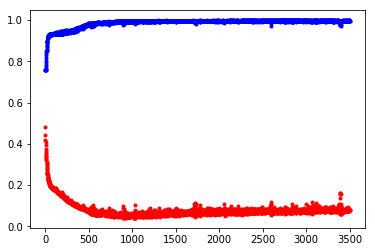

In [5]:
# 필요한 모듈 import
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 업로드
df_pre = pd.read_csv("C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\dataset\\wine.csv"
                     ,header=None)
df = df_pre.sample(frac=0.15)
dataset = df.values

X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models\\{epoch:02d}-{val_loss:.4f},hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X,Y,validation_split=0.33,epochs=3500, batch_size=500, verbose=0)

# y_loss에 테스트셋으로 실험결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x 값을 지정하고 정확도를 파란색, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len,y_vloss, "o", c="red", markersize=3)
plt.plot(x_len,y_acc, "o", c="blue", markersize=3)

plt.show()

In [ ]:
# 학습 자동 중단
# 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수 사용 : EarlyStopping() 함수

from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)


model.fit(X,Y, validation_split=0.33 , epochs=3500, batch_size=500, callbacks=[early_stopping_callback] )

In [7]:
# 모델 업데이트와 조기종료 하기 

# 필요한 라이브러리 import
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import os

# 시드값 설정
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 업로드
pd_pre = pd.read_csv('C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\dataset\\wine.csv'
                     , header=None)
df = pd_pre.sample(frac=0.15)
dataset = df.values

# 데이터 설정
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 생성 ( 30 ,12, 8, 1)
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 ( loss, optimizer, matrics) 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

# 모델 저장 경로 설정
MODEL_DIR = 'C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "C:\\Users\\HyunA\\PycharmProjects\\deeplearning\\models\\ex_models\\{epoch:02d}-{val_loss:.4f}.hdf5"         

# 모델 업데이트 및 저장 
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

# 모델 학습 
model.fit(X,Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0,
          callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.48570, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\01-0.4857.hdf5



Epoch 00002: val_loss improved from 0.48570 to 0.45982, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\02-0.4598.hdf5

Epoch 00003: val_loss improved from 0.45982 to 0.43357, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\03-0.4336.hdf5

Epoch 00004: val_loss improved from 0.43357 to 0.42007, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\04-0.4201.hdf5

Epoch 00005: val_loss improved from 0.42007 to 0.40724, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\05-0.4072.hdf5

Epoch 00006: val_loss improved from 0.40724 to 0.39412, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\06-0.3941.hdf5

Epoch 00007: val_loss improved from 0.39412 to 0.38608, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\07-0.3861.hdf5



Epoch 00008: val_loss improved from 0.38608 to 0.37909, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\08-0.3791.hdf5

Epoch 00009: val_loss improved from 0.37909 to 0.37241, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\09-0.3724.hdf5

Epoch 00010: val_loss improved from 0.37241 to 0.36550, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\10-0.3655.hdf5

Epoch 00011: val_loss improved from 0.36550 to 0.35941, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\11-0.3594.hdf5

Epoch 00012: val_loss improved from 0.35941 to 0.35426, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\12-0.3543.hdf5

Epoch 00013: val_loss improved from 0.35426 to 0.34957, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\13-0.3496.hdf5



Epoch 00014: val_loss improved from 0.34957 to 0.34475, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\14-0.3447.hdf5

Epoch 00015: val_loss improved from 0.34475 to 0.33880, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\15-0.3388.hdf5

Epoch 00016: val_loss improved from 0.33880 to 0.33344, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\16-0.3334.hdf5

Epoch 00017: val_loss improved from 0.33344 to 0.32875, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\17-0.3287.hdf5

Epoch 00018: val_loss improved from 0.32875 to 0.32499, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\18-0.3250.hdf5

Epoch 00019: val_loss improved from 0.32499 to 0.32346, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\19-0.3235.hdf5



Epoch 00020: val_loss improved from 0.32346 to 0.31966, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\20-0.3197.hdf5

Epoch 00021: val_loss improved from 0.31966 to 0.31246, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\21-0.3125.hdf5

Epoch 00022: val_loss improved from 0.31246 to 0.30772, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\22-0.3077.hdf5

Epoch 00023: val_loss improved from 0.30772 to 0.30354, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\23-0.3035.hdf5

Epoch 00024: val_loss improved from 0.30354 to 0.30034, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\24-0.3003.hdf5



Epoch 00025: val_loss improved from 0.30034 to 0.29832, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\25-0.2983.hdf5

Epoch 00026: val_loss improved from 0.29832 to 0.29363, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\26-0.2936.hdf5

Epoch 00027: val_loss improved from 0.29363 to 0.28777, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\27-0.2878.hdf5

Epoch 00028: val_loss improved from 0.28777 to 0.28382, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\28-0.2838.hdf5

Epoch 00029: val_loss improved from 0.28382 to 0.27926, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\29-0.2793.hdf5

Epoch 00030: val_loss improved from 0.27926 to 0.27653, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\30-0.2765.hdf5



Epoch 00031: val_loss improved from 0.27653 to 0.27250, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\31-0.2725.hdf5

Epoch 00032: val_loss improved from 0.27250 to 0.26768, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\32-0.2677.hdf5

Epoch 00033: val_loss improved from 0.26768 to 0.26394, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\33-0.2639.hdf5

Epoch 00034: val_loss improved from 0.26394 to 0.26054, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\34-0.2605.hdf5

Epoch 00035: val_loss improved from 0.26054 to 0.25881, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\35-0.2588.hdf5

Epoch 00036: val_loss improved from 0.25881 to 0.25558, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\36-0.2556.hdf5



Epoch 00037: val_loss improved from 0.25558 to 0.25233, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\37-0.2523.hdf5

Epoch 00038: val_loss improved from 0.25233 to 0.24975, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\38-0.2497.hdf5

Epoch 00039: val_loss improved from 0.24975 to 0.24757, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\39-0.2476.hdf5

Epoch 00040: val_loss improved from 0.24757 to 0.24563, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\40-0.2456.hdf5

Epoch 00041: val_loss improved from 0.24563 to 0.24462, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\41-0.2446.hdf5

Epoch 00042: val_loss improved from 0.24462 to 0.24245, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\42-0.2425.hdf5



Epoch 00043: val_loss improved from 0.24245 to 0.24061, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\43-0.2406.hdf5

Epoch 00044: val_loss improved from 0.24061 to 0.23862, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\44-0.2386.hdf5

Epoch 00045: val_loss improved from 0.23862 to 0.23790, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\45-0.2379.hdf5

Epoch 00046: val_loss improved from 0.23790 to 0.23771, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\46-0.2377.hdf5

Epoch 00047: val_loss improved from 0.23771 to 0.23516, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\47-0.2352.hdf5

Epoch 00048: val_loss improved from 0.23516 to 0.23241, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\48-0.2324.hdf5

Epoch 00049: val_loss improved from 0.23241 to 0.23076, saving model to C:\Users\HyunA\PycharmProjects\de


Epoch 00050: val_loss improved from 0.23076 to 0.22995, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\50-0.2300.hdf5

Epoch 00051: val_loss improved from 0.22995 to 0.22810, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\51-0.2281.hdf5

Epoch 00052: val_loss improved from 0.22810 to 0.22682, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\52-0.2268.hdf5

Epoch 00053: val_loss improved from 0.22682 to 0.22533, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\53-0.2253.hdf5

Epoch 00054: val_loss improved from 0.22533 to 0.22451, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\54-0.2245.hdf5

Epoch 00055: val_loss improved from 0.22451 to 0.22334, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\55-0.2233.hdf5

Epoch 00056: val_loss improved from 0.22334 to 0.22143, saving model to C:\Users\HyunA\PycharmProjects\de


Epoch 00057: val_loss improved from 0.22143 to 0.21989, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\57-0.2199.hdf5

Epoch 00058: val_loss improved from 0.21989 to 0.21835, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\58-0.2184.hdf5

Epoch 00059: val_loss improved from 0.21835 to 0.21685, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\59-0.2169.hdf5

Epoch 00060: val_loss improved from 0.21685 to 0.21655, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\60-0.2165.hdf5

Epoch 00061: val_loss did not improve from 0.21655

Epoch 00062: val_loss improved from 0.21655 to 0.21340, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\62-0.2134.hdf5

Epoch 00063: val_loss improved from 0.21340 to 0.21094, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\63-0.2109.hdf5



Epoch 00064: val_loss improved from 0.21094 to 0.20944, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\64-0.2094.hdf5

Epoch 00065: val_loss improved from 0.20944 to 0.20934, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\65-0.2093.hdf5

Epoch 00066: val_loss improved from 0.20934 to 0.20852, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\66-0.2085.hdf5

Epoch 00067: val_loss improved from 0.20852 to 0.20582, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\67-0.2058.hdf5

Epoch 00068: val_loss improved from 0.20582 to 0.20498, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\68-0.2050.hdf5

Epoch 00069: val_loss improved from 0.20498 to 0.20365, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\69-0.2036.hdf5

Epoch 00070: val_loss improved from 0.20365 to 0.20361, saving model to C:\Users\HyunA\PycharmProjects\de


Epoch 00071: val_loss did not improve from 0.20361

Epoch 00072: val_loss improved from 0.20361 to 0.20203, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\72-0.2020.hdf5

Epoch 00073: val_loss improved from 0.20203 to 0.19925, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\73-0.1992.hdf5

Epoch 00074: val_loss improved from 0.19925 to 0.19813, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\74-0.1981.hdf5

Epoch 00075: val_loss improved from 0.19813 to 0.19801, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\75-0.1980.hdf5

Epoch 00076: val_loss did not improve from 0.19801

Epoch 00077: val_loss improved from 0.19801 to 0.19744, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\77-0.1974.hdf5

Epoch 00078: val_loss improved from 0.19744 to 0.19579, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\78-0.1958.hdf5



Epoch 00079: val_loss improved from 0.19579 to 0.19303, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\79-0.1930.hdf5

Epoch 00080: val_loss improved from 0.19303 to 0.19165, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\80-0.1916.hdf5

Epoch 00081: val_loss did not improve from 0.19165

Epoch 00082: val_loss did not improve from 0.19165

Epoch 00083: val_loss improved from 0.19165 to 0.19146, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\83-0.1915.hdf5

Epoch 00084: val_loss improved from 0.19146 to 0.18849, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\84-0.1885.hdf5

Epoch 00085: val_loss improved from 0.18849 to 0.18763, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\85-0.1876.hdf5

Epoch 00086: val_loss improved from 0.18763 to 0.18738, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\86-0.1874.hdf5

E


Epoch 00088: val_loss did not improve from 0.18738

Epoch 00089: val_loss improved from 0.18738 to 0.18674, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\89-0.1867.hdf5

Epoch 00090: val_loss improved from 0.18674 to 0.18412, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\90-0.1841.hdf5

Epoch 00091: val_loss improved from 0.18412 to 0.18284, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\91-0.1828.hdf5

Epoch 00092: val_loss did not improve from 0.18284

Epoch 00093: val_loss did not improve from 0.18284

Epoch 00094: val_loss did not improve from 0.18284

Epoch 00095: val_loss improved from 0.18284 to 0.18191, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\95-0.1819.hdf5

Epoch 00096: val_loss improved from 0.18191 to 0.18099, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\96-0.1810.hdf5

Epoch 00097: val_loss improved from 0.18099 to


Epoch 00098: val_loss improved from 0.18057 to 0.17966, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\98-0.1797.hdf5

Epoch 00099: val_loss improved from 0.17966 to 0.17944, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\99-0.1794.hdf5

Epoch 00100: val_loss improved from 0.17944 to 0.17789, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\100-0.1779.hdf5

Epoch 00101: val_loss improved from 0.17789 to 0.17652, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\101-0.1765.hdf5

Epoch 00102: val_loss improved from 0.17652 to 0.17477, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\102-0.1748.hdf5

Epoch 00103: val_loss improved from 0.17477 to 0.17409, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\103-0.1741.hdf5



Epoch 00104: val_loss did not improve from 0.17409

Epoch 00105: val_loss did not improve from 0.17409

Epoch 00106: val_loss did not improve from 0.17409

Epoch 00107: val_loss improved from 0.17409 to 0.17042, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\107-0.1704.hdf5

Epoch 00108: val_loss improved from 0.17042 to 0.16963, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\108-0.1696.hdf5

Epoch 00109: val_loss did not improve from 0.16963

Epoch 00110: val_loss did not improve from 0.16963

Epoch 00111: val_loss did not improve from 0.16963

Epoch 00112: val_loss improved from 0.16963 to 0.16689, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\112-0.1669.hdf5

Epoch 00113: val_loss improved from 0.16689 to 0.16630, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\113-0.1663.hdf5

Epoch 00114: val_loss did not improve from 0.16630

Epoch 00115: val_loss did not impro


Epoch 00118: val_loss improved from 0.16488 to 0.16447, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\118-0.1645.hdf5

Epoch 00119: val_loss did not improve from 0.16447

Epoch 00120: val_loss did not improve from 0.16447

Epoch 00121: val_loss improved from 0.16447 to 0.16405, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\121-0.1640.hdf5

Epoch 00122: val_loss improved from 0.16405 to 0.16040, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\122-0.1604.hdf5

Epoch 00123: val_loss did not improve from 0.16040

Epoch 00124: val_loss did not improve from 0.16040

Epoch 00125: val_loss did not improve from 0.16040

Epoch 00126: val_loss did not improve from 0.16040

Epoch 00127: val_loss improved from 0.16040 to 0.15820, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\127-0.1582.hdf5

Epoch 00128: val_loss did not improve from 0.15820



Epoch 00129: val_loss did not improve from 0.15820

Epoch 00130: val_loss did not improve from 0.15820

Epoch 00131: val_loss did not improve from 0.15820

Epoch 00132: val_loss improved from 0.15820 to 0.15612, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\132-0.1561.hdf5

Epoch 00133: val_loss improved from 0.15612 to 0.15537, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\133-0.1554.hdf5

Epoch 00134: val_loss did not improve from 0.15537

Epoch 00135: val_loss did not improve from 0.15537

Epoch 00136: val_loss improved from 0.15537 to 0.15457, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\136-0.1546.hdf5

Epoch 00137: val_loss improved from 0.15457 to 0.15348, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\137-0.1535.hdf5

Epoch 00138: val_loss did not improve from 0.15348

Epoch 00139: val_loss did not improve from 0.15348

Epoch 00140: val_loss improved from


Epoch 00141: val_loss improved from 0.15236 to 0.15127, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\141-0.1513.hdf5

Epoch 00142: val_loss did not improve from 0.15127

Epoch 00143: val_loss did not improve from 0.15127

Epoch 00144: val_loss did not improve from 0.15127

Epoch 00145: val_loss improved from 0.15127 to 0.14922, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\145-0.1492.hdf5

Epoch 00146: val_loss improved from 0.14922 to 0.14884, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\146-0.1488.hdf5

Epoch 00147: val_loss did not improve from 0.14884

Epoch 00148: val_loss did not improve from 0.14884

Epoch 00149: val_loss did not improve from 0.14884

Epoch 00150: val_loss did not improve from 0.14884

Epoch 00151: val_loss did not improve from 0.14884

Epoch 00152: val_loss did not improve from 0.14884

Epoch 00153: val_loss did not improve from 0.14884

Epoch 00154: val_loss improve


Epoch 00156: val_loss did not improve from 0.14425

Epoch 00157: val_loss did not improve from 0.14425

Epoch 00158: val_loss did not improve from 0.14425

Epoch 00159: val_loss did not improve from 0.14425

Epoch 00160: val_loss improved from 0.14425 to 0.14337, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\160-0.1434.hdf5

Epoch 00161: val_loss did not improve from 0.14337

Epoch 00162: val_loss did not improve from 0.14337

Epoch 00163: val_loss improved from 0.14337 to 0.14271, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\163-0.1427.hdf5

Epoch 00164: val_loss improved from 0.14271 to 0.14071, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\164-0.1407.hdf5

Epoch 00165: val_loss did not improve from 0.14071

Epoch 00166: val_loss did not improve from 0.14071

Epoch 00167: val_loss did not improve from 0.14071

Epoch 00168: val_loss improved from 0.14071 to 0.13943, saving model to C:\Users\


Epoch 00170: val_loss did not improve from 0.13845

Epoch 00171: val_loss did not improve from 0.13845

Epoch 00172: val_loss did not improve from 0.13845

Epoch 00173: val_loss did not improve from 0.13845

Epoch 00174: val_loss did not improve from 0.13845

Epoch 00175: val_loss did not improve from 0.13845

Epoch 00176: val_loss improved from 0.13845 to 0.13548, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\176-0.1355.hdf5

Epoch 00177: val_loss did not improve from 0.13548

Epoch 00178: val_loss did not improve from 0.13548

Epoch 00179: val_loss did not improve from 0.13548

Epoch 00180: val_loss did not improve from 0.13548

Epoch 00181: val_loss improved from 0.13548 to 0.13336, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\181-0.1334.hdf5

Epoch 00182: val_loss did not improve from 0.13336

Epoch 00183: val_loss did not improve from 0.13336

Epoch 00184: val_loss did not improve from 0.13336

Epoch 00185: val_loss d


Epoch 00191: val_loss did not improve from 0.13037

Epoch 00192: val_loss did not improve from 0.13037

Epoch 00193: val_loss did not improve from 0.13037

Epoch 00194: val_loss improved from 0.13037 to 0.13012, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\194-0.1301.hdf5

Epoch 00195: val_loss did not improve from 0.13012

Epoch 00196: val_loss did not improve from 0.13012

Epoch 00197: val_loss improved from 0.13012 to 0.12980, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\197-0.1298.hdf5

Epoch 00198: val_loss improved from 0.12980 to 0.12759, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\198-0.1276.hdf5

Epoch 00199: val_loss did not improve from 0.12759

Epoch 00200: val_loss did not improve from 0.12759

Epoch 00201: val_loss did not improve from 0.12759

Epoch 00202: val_loss improved from 0.12759 to 0.12663, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\


Epoch 00204: val_loss did not improve from 0.12663

Epoch 00205: val_loss did not improve from 0.12663

Epoch 00206: val_loss improved from 0.12663 to 0.12592, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\206-0.1259.hdf5

Epoch 00207: val_loss did not improve from 0.12592

Epoch 00208: val_loss did not improve from 0.12592

Epoch 00209: val_loss did not improve from 0.12592

Epoch 00210: val_loss did not improve from 0.12592

Epoch 00211: val_loss improved from 0.12592 to 0.12494, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\211-0.1249.hdf5

Epoch 00212: val_loss did not improve from 0.12494

Epoch 00213: val_loss did not improve from 0.12494

Epoch 00214: val_loss did not improve from 0.12494

Epoch 00215: val_loss improved from 0.12494 to 0.12368, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\215-0.1237.hdf5

Epoch 00216: val_loss did not improve from 0.12368

Epoch 00217: val_loss did not


Epoch 00225: val_loss did not improve from 0.12368

Epoch 00226: val_loss did not improve from 0.12368

Epoch 00227: val_loss improved from 0.12368 to 0.12215, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\227-0.1221.hdf5

Epoch 00228: val_loss did not improve from 0.12215

Epoch 00229: val_loss did not improve from 0.12215

Epoch 00230: val_loss improved from 0.12215 to 0.12083, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\230-0.1208.hdf5

Epoch 00231: val_loss improved from 0.12083 to 0.11951, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\231-0.1195.hdf5

Epoch 00232: val_loss did not improve from 0.11951

Epoch 00233: val_loss did not improve from 0.11951

Epoch 00234: val_loss improved from 0.11951 to 0.11861, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\234-0.1186.hdf5

Epoch 00235: val_loss did not improve from 0.11861

Epoch 00236: val_loss did not impro


Epoch 00240: val_loss did not improve from 0.11793

Epoch 00241: val_loss did not improve from 0.11793

Epoch 00242: val_loss improved from 0.11793 to 0.11577, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\242-0.1158.hdf5

Epoch 00243: val_loss did not improve from 0.11577

Epoch 00244: val_loss did not improve from 0.11577

Epoch 00245: val_loss did not improve from 0.11577

Epoch 00246: val_loss did not improve from 0.11577

Epoch 00247: val_loss did not improve from 0.11577

Epoch 00248: val_loss did not improve from 0.11577

Epoch 00249: val_loss improved from 0.11577 to 0.11570, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\249-0.1157.hdf5

Epoch 00250: val_loss improved from 0.11570 to 0.11351, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\250-0.1135.hdf5

Epoch 00251: val_loss did not improve from 0.11351

Epoch 00252: val_loss did not improve from 0.11351

Epoch 00253: val_loss did not


Epoch 00255: val_loss did not improve from 0.11339

Epoch 00256: val_loss did not improve from 0.11339

Epoch 00257: val_loss did not improve from 0.11339

Epoch 00258: val_loss improved from 0.11339 to 0.11264, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\258-0.1126.hdf5

Epoch 00259: val_loss did not improve from 0.11264

Epoch 00260: val_loss did not improve from 0.11264

Epoch 00261: val_loss improved from 0.11264 to 0.11232, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\261-0.1123.hdf5

Epoch 00262: val_loss improved from 0.11232 to 0.11139, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\262-0.1114.hdf5

Epoch 00263: val_loss did not improve from 0.11139

Epoch 00264: val_loss did not improve from 0.11139

Epoch 00265: val_loss did not improve from 0.11139

Epoch 00266: val_loss improved from 0.11139 to 0.10860, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\


Epoch 00271: val_loss did not improve from 0.10860

Epoch 00272: val_loss did not improve from 0.10860

Epoch 00273: val_loss did not improve from 0.10860

Epoch 00274: val_loss did not improve from 0.10860

Epoch 00275: val_loss did not improve from 0.10860

Epoch 00276: val_loss did not improve from 0.10860

Epoch 00277: val_loss did not improve from 0.10860

Epoch 00278: val_loss did not improve from 0.10860

Epoch 00279: val_loss improved from 0.10860 to 0.10794, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\279-0.1079.hdf5

Epoch 00280: val_loss did not improve from 0.10794

Epoch 00281: val_loss did not improve from 0.10794

Epoch 00282: val_loss did not improve from 0.10794

Epoch 00283: val_loss did not improve from 0.10794

Epoch 00284: val_loss did not improve from 0.10794

Epoch 00285: val_loss did not improve from 0.10794

Epoch 00286: val_loss did not improve from 0.10794

Epoch 00287: val_loss improved from 0.10794 to 0.10619, saving model 


Epoch 00293: val_loss did not improve from 0.10419

Epoch 00294: val_loss did not improve from 0.10419

Epoch 00295: val_loss did not improve from 0.10419

Epoch 00296: val_loss did not improve from 0.10419

Epoch 00297: val_loss did not improve from 0.10419

Epoch 00298: val_loss did not improve from 0.10419

Epoch 00299: val_loss improved from 0.10419 to 0.10038, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\299-0.1004.hdf5

Epoch 00300: val_loss did not improve from 0.10038

Epoch 00301: val_loss did not improve from 0.10038

Epoch 00302: val_loss did not improve from 0.10038

Epoch 00303: val_loss did not improve from 0.10038

Epoch 00304: val_loss did not improve from 0.10038

Epoch 00305: val_loss did not improve from 0.10038

Epoch 00306: val_loss improved from 0.10038 to 0.09943, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\306-0.0994.hdf5

Epoch 00307: val_loss did not improve from 0.09943

Epoch 00308: val_loss d


Epoch 00312: val_loss did not improve from 0.09895

Epoch 00313: val_loss did not improve from 0.09895

Epoch 00314: val_loss did not improve from 0.09895

Epoch 00315: val_loss did not improve from 0.09895

Epoch 00316: val_loss did not improve from 0.09895

Epoch 00317: val_loss did not improve from 0.09895

Epoch 00318: val_loss did not improve from 0.09895

Epoch 00319: val_loss did not improve from 0.09895

Epoch 00320: val_loss improved from 0.09895 to 0.09776, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\320-0.0978.hdf5

Epoch 00321: val_loss did not improve from 0.09776

Epoch 00322: val_loss did not improve from 0.09776

Epoch 00323: val_loss improved from 0.09776 to 0.09583, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\323-0.0958.hdf5

Epoch 00324: val_loss did not improve from 0.09583

Epoch 00325: val_loss did not improve from 0.09583

Epoch 00326: val_loss did not improve from 0.09583

Epoch 00327: val_loss d


Epoch 00335: val_loss did not improve from 0.09337

Epoch 00336: val_loss did not improve from 0.09337

Epoch 00337: val_loss improved from 0.09337 to 0.09168, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\337-0.0917.hdf5

Epoch 00338: val_loss did not improve from 0.09168

Epoch 00339: val_loss did not improve from 0.09168

Epoch 00340: val_loss did not improve from 0.09168

Epoch 00341: val_loss did not improve from 0.09168

Epoch 00342: val_loss did not improve from 0.09168

Epoch 00343: val_loss did not improve from 0.09168

Epoch 00344: val_loss did not improve from 0.09168

Epoch 00345: val_loss did not improve from 0.09168

Epoch 00346: val_loss did not improve from 0.09168

Epoch 00347: val_loss did not improve from 0.09168

Epoch 00348: val_loss did not improve from 0.09168

Epoch 00349: val_loss did not improve from 0.09168

Epoch 00350: val_loss did not improve from 0.09168

Epoch 00351: val_loss did not improve from 0.09168

Epoch 00352: val_


Epoch 00358: val_loss did not improve from 0.09062

Epoch 00359: val_loss did not improve from 0.09062

Epoch 00360: val_loss did not improve from 0.09062

Epoch 00361: val_loss did not improve from 0.09062

Epoch 00362: val_loss improved from 0.09062 to 0.08889, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\362-0.0889.hdf5

Epoch 00363: val_loss did not improve from 0.08889

Epoch 00364: val_loss did not improve from 0.08889

Epoch 00365: val_loss did not improve from 0.08889

Epoch 00366: val_loss did not improve from 0.08889

Epoch 00367: val_loss did not improve from 0.08889

Epoch 00368: val_loss did not improve from 0.08889

Epoch 00369: val_loss did not improve from 0.08889

Epoch 00370: val_loss improved from 0.08889 to 0.08670, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\370-0.0867.hdf5

Epoch 00371: val_loss did not improve from 0.08670

Epoch 00372: val_loss did not improve from 0.08670

Epoch 00373: val_loss d


Epoch 00378: val_loss improved from 0.08537 to 0.08506, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\378-0.0851.hdf5

Epoch 00379: val_loss did not improve from 0.08506

Epoch 00380: val_loss did not improve from 0.08506

Epoch 00381: val_loss did not improve from 0.08506

Epoch 00382: val_loss improved from 0.08506 to 0.08481, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\382-0.0848.hdf5

Epoch 00383: val_loss did not improve from 0.08481

Epoch 00384: val_loss did not improve from 0.08481

Epoch 00385: val_loss did not improve from 0.08481

Epoch 00386: val_loss improved from 0.08481 to 0.08379, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\386-0.0838.hdf5

Epoch 00387: val_loss did not improve from 0.08379

Epoch 00388: val_loss did not improve from 0.08379

Epoch 00389: val_loss did not improve from 0.08379

Epoch 00390: val_loss improved from 0.08379 to 0.08315, saving model to C:\Users\


Epoch 00392: val_loss did not improve from 0.08315

Epoch 00393: val_loss did not improve from 0.08315

Epoch 00394: val_loss did not improve from 0.08315

Epoch 00395: val_loss did not improve from 0.08315

Epoch 00396: val_loss did not improve from 0.08315

Epoch 00397: val_loss improved from 0.08315 to 0.08061, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\397-0.0806.hdf5

Epoch 00398: val_loss did not improve from 0.08061

Epoch 00399: val_loss did not improve from 0.08061

Epoch 00400: val_loss did not improve from 0.08061

Epoch 00401: val_loss did not improve from 0.08061

Epoch 00402: val_loss did not improve from 0.08061

Epoch 00403: val_loss did not improve from 0.08061

Epoch 00404: val_loss did not improve from 0.08061

Epoch 00405: val_loss did not improve from 0.08061

Epoch 00406: val_loss did not improve from 0.08061

Epoch 00407: val_loss improved from 0.08061 to 0.07965, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\model


Epoch 00418: val_loss improved from 0.07965 to 0.07906, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\418-0.0791.hdf5

Epoch 00419: val_loss did not improve from 0.07906

Epoch 00420: val_loss did not improve from 0.07906

Epoch 00421: val_loss improved from 0.07906 to 0.07670, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\421-0.0767.hdf5

Epoch 00422: val_loss did not improve from 0.07670

Epoch 00423: val_loss did not improve from 0.07670

Epoch 00424: val_loss did not improve from 0.07670

Epoch 00425: val_loss improved from 0.07670 to 0.07586, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\425-0.0759.hdf5

Epoch 00426: val_loss did not improve from 0.07586

Epoch 00427: val_loss did not improve from 0.07586

Epoch 00428: val_loss did not improve from 0.07586

Epoch 00429: val_loss improved from 0.07586 to 0.07574, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\


Epoch 00433: val_loss did not improve from 0.07511

Epoch 00434: val_loss did not improve from 0.07511

Epoch 00435: val_loss did not improve from 0.07511

Epoch 00436: val_loss did not improve from 0.07511

Epoch 00437: val_loss did not improve from 0.07511

Epoch 00438: val_loss did not improve from 0.07511

Epoch 00439: val_loss improved from 0.07511 to 0.07473, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\439-0.0747.hdf5

Epoch 00440: val_loss did not improve from 0.07473

Epoch 00441: val_loss did not improve from 0.07473

Epoch 00442: val_loss did not improve from 0.07473

Epoch 00443: val_loss did not improve from 0.07473

Epoch 00444: val_loss did not improve from 0.07473

Epoch 00445: val_loss did not improve from 0.07473

Epoch 00446: val_loss did not improve from 0.07473

Epoch 00447: val_loss did not improve from 0.07473

Epoch 00448: val_loss improved from 0.07473 to 0.07301, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\model


Epoch 00454: val_loss did not improve from 0.07263

Epoch 00455: val_loss did not improve from 0.07263

Epoch 00456: val_loss did not improve from 0.07263

Epoch 00457: val_loss did not improve from 0.07263

Epoch 00458: val_loss did not improve from 0.07263

Epoch 00459: val_loss improved from 0.07263 to 0.07161, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\459-0.0716.hdf5

Epoch 00460: val_loss did not improve from 0.07161

Epoch 00461: val_loss did not improve from 0.07161

Epoch 00462: val_loss did not improve from 0.07161

Epoch 00463: val_loss did not improve from 0.07161

Epoch 00464: val_loss did not improve from 0.07161

Epoch 00465: val_loss did not improve from 0.07161

Epoch 00466: val_loss did not improve from 0.07161

Epoch 00467: val_loss did not improve from 0.07161

Epoch 00468: val_loss did not improve from 0.07161

Epoch 00469: val_loss did not improve from 0.07161

Epoch 00470: val_loss did not improve from 0.07161

Epoch 00471: val_


Epoch 00480: val_loss did not improve from 0.07022

Epoch 00481: val_loss did not improve from 0.07022

Epoch 00482: val_loss did not improve from 0.07022

Epoch 00483: val_loss did not improve from 0.07022

Epoch 00484: val_loss did not improve from 0.07022

Epoch 00485: val_loss did not improve from 0.07022

Epoch 00486: val_loss did not improve from 0.07022

Epoch 00487: val_loss did not improve from 0.07022

Epoch 00488: val_loss improved from 0.07022 to 0.07012, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\488-0.0701.hdf5

Epoch 00489: val_loss did not improve from 0.07012

Epoch 00490: val_loss did not improve from 0.07012

Epoch 00491: val_loss did not improve from 0.07012

Epoch 00492: val_loss improved from 0.07012 to 0.07006, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\492-0.0701.hdf5

Epoch 00493: val_loss did not improve from 0.07006

Epoch 00494: val_loss did not improve from 0.07006

Epoch 00495: val_loss i


Epoch 00497: val_loss did not improve from 0.06943

Epoch 00498: val_loss improved from 0.06943 to 0.06833, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\498-0.0683.hdf5

Epoch 00499: val_loss did not improve from 0.06833

Epoch 00500: val_loss did not improve from 0.06833

Epoch 00501: val_loss did not improve from 0.06833

Epoch 00502: val_loss improved from 0.06833 to 0.06760, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\502-0.0676.hdf5

Epoch 00503: val_loss did not improve from 0.06760

Epoch 00504: val_loss did not improve from 0.06760

Epoch 00505: val_loss did not improve from 0.06760

Epoch 00506: val_loss improved from 0.06760 to 0.06744, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\506-0.0674.hdf5

Epoch 00507: val_loss did not improve from 0.06744

Epoch 00508: val_loss did not improve from 0.06744

Epoch 00509: val_loss improved from 0.06744 to 0.06735, saving model to C:\Users\


Epoch 00511: val_loss did not improve from 0.06735

Epoch 00512: val_loss did not improve from 0.06735

Epoch 00513: val_loss improved from 0.06735 to 0.06698, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\513-0.0670.hdf5

Epoch 00514: val_loss did not improve from 0.06698

Epoch 00515: val_loss did not improve from 0.06698

Epoch 00516: val_loss improved from 0.06698 to 0.06621, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\516-0.0662.hdf5

Epoch 00517: val_loss did not improve from 0.06621

Epoch 00518: val_loss did not improve from 0.06621

Epoch 00519: val_loss did not improve from 0.06621

Epoch 00520: val_loss did not improve from 0.06621

Epoch 00521: val_loss did not improve from 0.06621

Epoch 00522: val_loss did not improve from 0.06621

Epoch 00523: val_loss improved from 0.06621 to 0.06352, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\523-0.0635.hdf5

Epoch 00524: val_loss did not


Epoch 00529: val_loss did not improve from 0.06325

Epoch 00530: val_loss improved from 0.06325 to 0.06260, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\530-0.0626.hdf5

Epoch 00531: val_loss did not improve from 0.06260

Epoch 00532: val_loss did not improve from 0.06260

Epoch 00533: val_loss did not improve from 0.06260

Epoch 00534: val_loss did not improve from 0.06260

Epoch 00535: val_loss did not improve from 0.06260

Epoch 00536: val_loss did not improve from 0.06260

Epoch 00537: val_loss did not improve from 0.06260

Epoch 00538: val_loss did not improve from 0.06260

Epoch 00539: val_loss did not improve from 0.06260

Epoch 00540: val_loss did not improve from 0.06260

Epoch 00541: val_loss did not improve from 0.06260

Epoch 00542: val_loss did not improve from 0.06260

Epoch 00543: val_loss improved from 0.06260 to 0.06198, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\543-0.0620.hdf5

Epoch 00544: val_loss d


Epoch 00545: val_loss did not improve from 0.06198

Epoch 00546: val_loss did not improve from 0.06198

Epoch 00547: val_loss improved from 0.06198 to 0.06152, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\547-0.0615.hdf5

Epoch 00548: val_loss did not improve from 0.06152

Epoch 00549: val_loss did not improve from 0.06152

Epoch 00550: val_loss did not improve from 0.06152

Epoch 00551: val_loss did not improve from 0.06152

Epoch 00552: val_loss did not improve from 0.06152

Epoch 00553: val_loss did not improve from 0.06152

Epoch 00554: val_loss improved from 0.06152 to 0.06111, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\554-0.0611.hdf5

Epoch 00555: val_loss did not improve from 0.06111

Epoch 00556: val_loss did not improve from 0.06111

Epoch 00557: val_loss did not improve from 0.06111

Epoch 00558: val_loss did not improve from 0.06111

Epoch 00559: val_loss did not improve from 0.06111

Epoch 00560: val_loss d


Epoch 00565: val_loss improved from 0.06111 to 0.06088, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\565-0.0609.hdf5

Epoch 00566: val_loss improved from 0.06088 to 0.06027, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\566-0.0603.hdf5

Epoch 00567: val_loss did not improve from 0.06027

Epoch 00568: val_loss did not improve from 0.06027

Epoch 00569: val_loss did not improve from 0.06027

Epoch 00570: val_loss did not improve from 0.06027

Epoch 00571: val_loss did not improve from 0.06027

Epoch 00572: val_loss did not improve from 0.06027

Epoch 00573: val_loss did not improve from 0.06027

Epoch 00574: val_loss improved from 0.06027 to 0.05932, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\574-0.0593.hdf5

Epoch 00575: val_loss did not improve from 0.05932



Epoch 00576: val_loss did not improve from 0.05932

Epoch 00577: val_loss improved from 0.05932 to 0.05923, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\577-0.0592.hdf5

Epoch 00578: val_loss improved from 0.05923 to 0.05894, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\578-0.0589.hdf5

Epoch 00579: val_loss did not improve from 0.05894

Epoch 00580: val_loss improved from 0.05894 to 0.05773, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\580-0.0577.hdf5

Epoch 00581: val_loss did not improve from 0.05773

Epoch 00582: val_loss did not improve from 0.05773

Epoch 00583: val_loss did not improve from 0.05773

Epoch 00584: val_loss did not improve from 0.05773

Epoch 00585: val_loss did not improve from 0.05773

Epoch 00586: val_loss did not improve from 0.05773

Epoch 00587: val_loss did not improve from 0.05773

Epoch 00588: val_loss did not improve from 0.05773

Epoch 00589: val_loss did not


Epoch 00591: val_loss did not improve from 0.05773

Epoch 00592: val_loss did not improve from 0.05773

Epoch 00593: val_loss did not improve from 0.05773

Epoch 00594: val_loss did not improve from 0.05773

Epoch 00595: val_loss did not improve from 0.05773

Epoch 00596: val_loss did not improve from 0.05773

Epoch 00597: val_loss did not improve from 0.05773

Epoch 00598: val_loss improved from 0.05773 to 0.05651, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\598-0.0565.hdf5

Epoch 00599: val_loss did not improve from 0.05651

Epoch 00600: val_loss did not improve from 0.05651

Epoch 00601: val_loss did not improve from 0.05651

Epoch 00602: val_loss did not improve from 0.05651

Epoch 00603: val_loss did not improve from 0.05651

Epoch 00604: val_loss did not improve from 0.05651

Epoch 00605: val_loss did not improve from 0.05651

Epoch 00606: val_loss did not improve from 0.05651

Epoch 00607: val_loss did not improve from 0.05651

Epoch 00608: val_


Epoch 00613: val_loss did not improve from 0.05575

Epoch 00614: val_loss improved from 0.05575 to 0.05548, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\614-0.0555.hdf5

Epoch 00615: val_loss did not improve from 0.05548

Epoch 00616: val_loss did not improve from 0.05548

Epoch 00617: val_loss did not improve from 0.05548

Epoch 00618: val_loss improved from 0.05548 to 0.05490, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\618-0.0549.hdf5

Epoch 00619: val_loss did not improve from 0.05490

Epoch 00620: val_loss did not improve from 0.05490

Epoch 00621: val_loss improved from 0.05490 to 0.05458, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\621-0.0546.hdf5

Epoch 00622: val_loss did not improve from 0.05458

Epoch 00623: val_loss did not improve from 0.05458

Epoch 00624: val_loss improved from 0.05458 to 0.05455, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\


Epoch 00626: val_loss did not improve from 0.05329

Epoch 00627: val_loss did not improve from 0.05329

Epoch 00628: val_loss improved from 0.05329 to 0.05304, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\628-0.0530.hdf5

Epoch 00629: val_loss did not improve from 0.05304

Epoch 00630: val_loss did not improve from 0.05304

Epoch 00631: val_loss did not improve from 0.05304

Epoch 00632: val_loss did not improve from 0.05304

Epoch 00633: val_loss did not improve from 0.05304

Epoch 00634: val_loss did not improve from 0.05304

Epoch 00635: val_loss did not improve from 0.05304

Epoch 00636: val_loss did not improve from 0.05304

Epoch 00637: val_loss did not improve from 0.05304

Epoch 00638: val_loss did not improve from 0.05304

Epoch 00639: val_loss did not improve from 0.05304

Epoch 00640: val_loss did not improve from 0.05304

Epoch 00641: val_loss did not improve from 0.05304

Epoch 00642: val_loss did not improve from 0.05304

Epoch 00643: val_


Epoch 00647: val_loss did not improve from 0.05203

Epoch 00648: val_loss improved from 0.05203 to 0.05161, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\648-0.0516.hdf5

Epoch 00649: val_loss did not improve from 0.05161

Epoch 00650: val_loss did not improve from 0.05161

Epoch 00651: val_loss did not improve from 0.05161

Epoch 00652: val_loss did not improve from 0.05161

Epoch 00653: val_loss did not improve from 0.05161

Epoch 00654: val_loss did not improve from 0.05161

Epoch 00655: val_loss did not improve from 0.05161

Epoch 00656: val_loss did not improve from 0.05161

Epoch 00657: val_loss did not improve from 0.05161

Epoch 00658: val_loss did not improve from 0.05161

Epoch 00659: val_loss did not improve from 0.05161

Epoch 00660: val_loss did not improve from 0.05161

Epoch 00661: val_loss did not improve from 0.05161

Epoch 00662: val_loss improved from 0.05161 to 0.05139, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\model


Epoch 00666: val_loss did not improve from 0.05113

Epoch 00667: val_loss did not improve from 0.05113

Epoch 00668: val_loss did not improve from 0.05113

Epoch 00669: val_loss improved from 0.05113 to 0.05032, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\669-0.0503.hdf5

Epoch 00670: val_loss did not improve from 0.05032

Epoch 00671: val_loss improved from 0.05032 to 0.04981, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\671-0.0498.hdf5

Epoch 00672: val_loss did not improve from 0.04981

Epoch 00673: val_loss did not improve from 0.04981

Epoch 00674: val_loss did not improve from 0.04981

Epoch 00675: val_loss did not improve from 0.04981

Epoch 00676: val_loss did not improve from 0.04981

Epoch 00677: val_loss improved from 0.04981 to 0.04856, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\677-0.0486.hdf5

Epoch 00678: val_loss did not improve from 0.04856

Epoch 00679: val_loss did not


Epoch 00681: val_loss did not improve from 0.04825

Epoch 00682: val_loss did not improve from 0.04825

Epoch 00683: val_loss did not improve from 0.04825

Epoch 00684: val_loss did not improve from 0.04825

Epoch 00685: val_loss did not improve from 0.04825

Epoch 00686: val_loss did not improve from 0.04825

Epoch 00687: val_loss did not improve from 0.04825

Epoch 00688: val_loss did not improve from 0.04825

Epoch 00689: val_loss did not improve from 0.04825

Epoch 00690: val_loss did not improve from 0.04825

Epoch 00691: val_loss did not improve from 0.04825

Epoch 00692: val_loss improved from 0.04825 to 0.04814, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\692-0.0481.hdf5

Epoch 00693: val_loss did not improve from 0.04814

Epoch 00694: val_loss improved from 0.04814 to 0.04762, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\694-0.0476.hdf5

Epoch 00695: val_loss improved from 0.04762 to 0.04725, saving model to C:\


Epoch 00699: val_loss improved from 0.04527 to 0.04430, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\699-0.0443.hdf5

Epoch 00700: val_loss did not improve from 0.04430

Epoch 00701: val_loss improved from 0.04430 to 0.04333, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\701-0.0433.hdf5

Epoch 00702: val_loss did not improve from 0.04333

Epoch 00703: val_loss did not improve from 0.04333

Epoch 00704: val_loss did not improve from 0.04333

Epoch 00705: val_loss did not improve from 0.04333

Epoch 00706: val_loss improved from 0.04333 to 0.04328, saving model to C:\Users\HyunA\PycharmProjects\deeplearning\models\ex_models\706-0.0433.hdf5

Epoch 00707: val_loss did not improve from 0.04328

Epoch 00708: val_loss did not improve from 0.04328

Epoch 00709: val_loss did not improve from 0.04328

Epoch 00710: val_loss did not improve from 0.04328

Epoch 00711: val_loss did not improve from 0.04328



Epoch 00712: val_loss did not improve from 0.04328

Epoch 00713: val_loss did not improve from 0.04328

Epoch 00714: val_loss did not improve from 0.04328

Epoch 00715: val_loss did not improve from 0.04328

Epoch 00716: val_loss did not improve from 0.04328

Epoch 00717: val_loss did not improve from 0.04328

Epoch 00718: val_loss did not improve from 0.04328

Epoch 00719: val_loss did not improve from 0.04328

Epoch 00720: val_loss did not improve from 0.04328

Epoch 00721: val_loss did not improve from 0.04328

Epoch 00722: val_loss did not improve from 0.04328

Epoch 00723: val_loss did not improve from 0.04328

Epoch 00724: val_loss did not improve from 0.04328

Epoch 00725: val_loss did not improve from 0.04328

Epoch 00726: val_loss did not improve from 0.04328

Epoch 00727: val_loss did not improve from 0.04328

Epoch 00728: val_loss did not improve from 0.04328

Epoch 00729: val_loss did not improve from 0.04328

Epoch 00730: val_loss did not improve from 0.04328

Epoch 00731


Epoch 00750: val_loss did not improve from 0.04328

Epoch 00751: val_loss did not improve from 0.04328

Epoch 00752: val_loss did not improve from 0.04328

Epoch 00753: val_loss did not improve from 0.04328

Epoch 00754: val_loss did not improve from 0.04328

Epoch 00755: val_loss did not improve from 0.04328

Epoch 00756: val_loss did not improve from 0.04328

Epoch 00757: val_loss did not improve from 0.04328

Epoch 00758: val_loss did not improve from 0.04328

Epoch 00759: val_loss did not improve from 0.04328

Epoch 00760: val_loss did not improve from 0.04328

Epoch 00761: val_loss did not improve from 0.04328

Epoch 00762: val_loss did not improve from 0.04328

Epoch 00763: val_loss did not improve from 0.04328

Epoch 00764: val_loss did not improve from 0.04328

Epoch 00765: val_loss did not improve from 0.04328

Epoch 00766: val_loss did not improve from 0.04328

Epoch 00767: val_loss did not improve from 0.04328

Epoch 00768: val_loss did not improve from 0.04328

Epoch 00769


Epoch 00786: val_loss did not improve from 0.04328

Epoch 00787: val_loss did not improve from 0.04328

Epoch 00788: val_loss did not improve from 0.04328

Epoch 00789: val_loss did not improve from 0.04328

Epoch 00790: val_loss did not improve from 0.04328

Epoch 00791: val_loss did not improve from 0.04328

Epoch 00792: val_loss did not improve from 0.04328

Epoch 00793: val_loss did not improve from 0.04328

Epoch 00794: val_loss did not improve from 0.04328

Epoch 00795: val_loss did not improve from 0.04328

Epoch 00796: val_loss did not improve from 0.04328

Epoch 00797: val_loss did not improve from 0.04328

Epoch 00798: val_loss did not improve from 0.04328

Epoch 00799: val_loss did not improve from 0.04328

Epoch 00800: val_loss did not improve from 0.04328

Epoch 00801: val_loss did not improve from 0.04328

Epoch 00802: val_loss did not improve from 0.04328

Epoch 00803: val_loss did not improve from 0.04328

Epoch 00804: val_loss did not improve from 0.04328

Epoch 00805